In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams["font.size"] = 14

acc_df = pd.read_csv('./animalcrossing/accessories.csv')

Index(['Black', 'Green', 'Pink', 'Red', 'Yellow', 'White', 'Purple', 'Blue',
       'Brown', 'lightblue', 'Orange', 'Gray', 'hotpink', 'Beige'],
      dtype='object')


<BarContainer object of 14 artists>

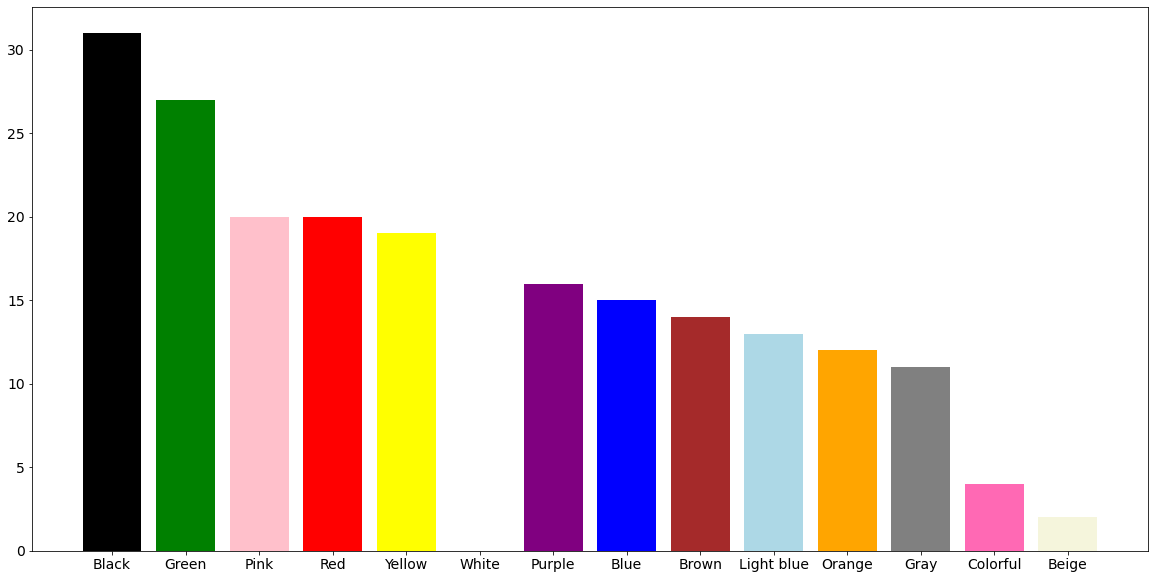

In [32]:
number_of_colors = acc_df["Color 1"].value_counts()

color_replace = {
    "Light blue": "lightblue",
    "Colorful": "hotpink"
}

colors = number_of_colors.rename(color_replace).keys()
color_names = number_of_colors.keys()

print(colors)
plt.bar(color_names, number_of_colors, color=colors)

In [33]:
colors_df = acc_df[["Color 1", "Color 2"]]


Color 1
0          14
dtype: int64


TypeError: 'value' must be an instance of str or bytes, not a tuple

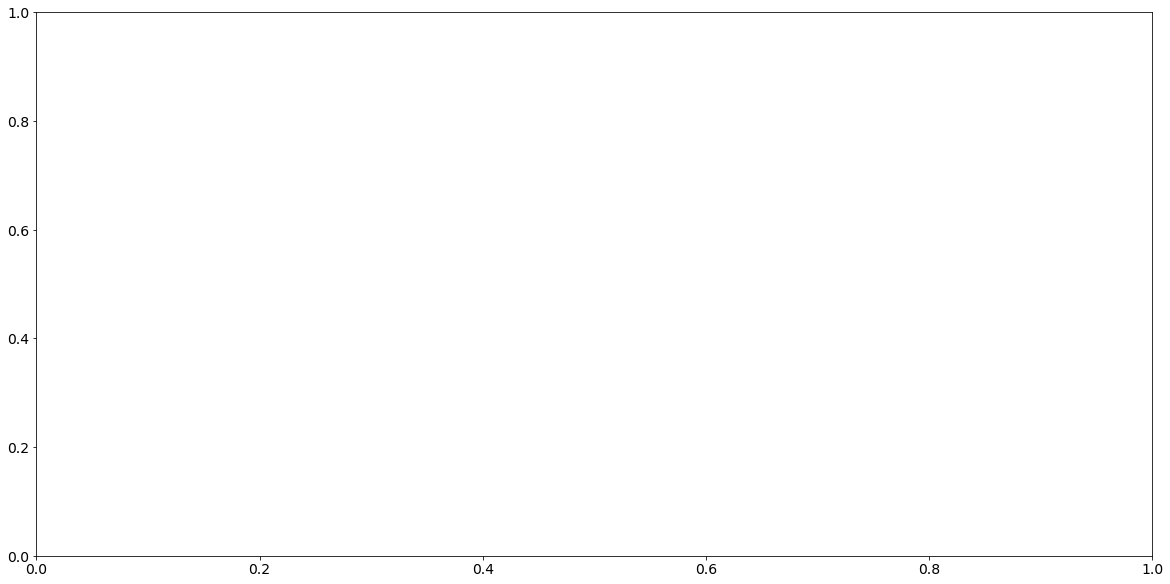

In [141]:
colors2 = acc_df["Color 2"].unique()
data = {}
for col in colors2:
    data[col] = 0
arr_of_cols = pd.DataFrame.from_dict(data, orient='index', columns=["Color 1"])
print(arr_of_cols.value_counts())

for col in colors2:
    number_of_colors = colors_df[colors_df["Color 2"] == col].value_counts()
    number_of_colors += arr_of_cols.value_counts()
    color_replace = {
        "Light blue": "lightblue",
        "Colorful": "hotpink",
        "Beige": "Moccasin"
    }

    colors = number_of_colors.rename(color_replace).keys()
    color_names = number_of_colors.keys()
    color = col
    if color in color_replace:
        color = color_replace[color]
    plt.bar(color_names, number_of_colors, bottom=arr_of_cols ,color=[color], label=col)
    arr_of_cols += number_of_colors

plt.xlabel("Color 1")
plt.ylabel("Number of accessories")
plt.title("Ammount of Accessories with Color 1 and Color 2")
plt.legend()
ax = plt.gca()
ax.set_facecolor("LightSalmon")
plt.show()

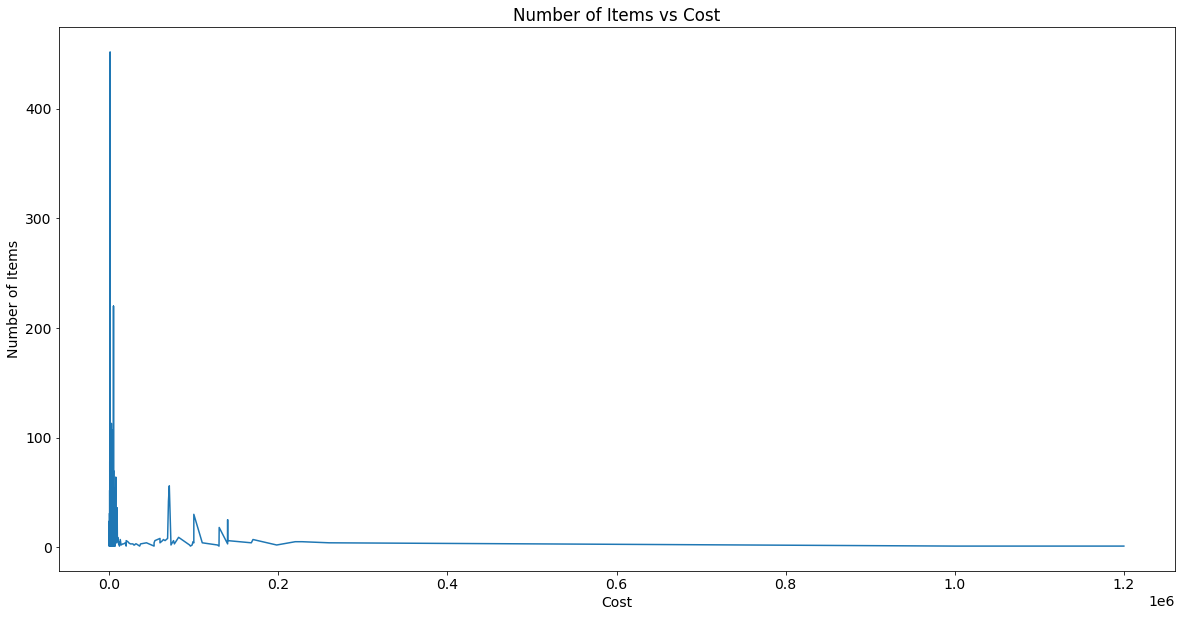

In [190]:
from pathlib import Path

pathlist = Path("./animalcrossing").glob('*.csv')
df_tot = pd.DataFrame()

for file in pathlist:
    df = pd.read_csv(file)

    if "Buy" in df.columns:
        y = df["Buy"].dropna()
        y = y[y != "NFS"].astype(int)
        x = y.value_counts().rename_axis("cost").reset_index(name="counts")
        df_tot = pd.concat([df_tot, x])
        #plt.bar(x.keys(), x)
        
df_tot = df_tot.sort_values("cost")
plt.plot(df_tot["cost"], df_tot["counts"])
plt.title("Number of Items vs Cost")
plt.ylabel("Number of Items")
plt.xlabel("Cost")
plt.show()

    cost  counts
7     40       1
7     40       1
5    100       1
28   120       7
7    140       8
..   ...     ...
22  8500      25
76  8700       6
6   8900       8
15  9300      36
83  9600       5

[565 rows x 2 columns]


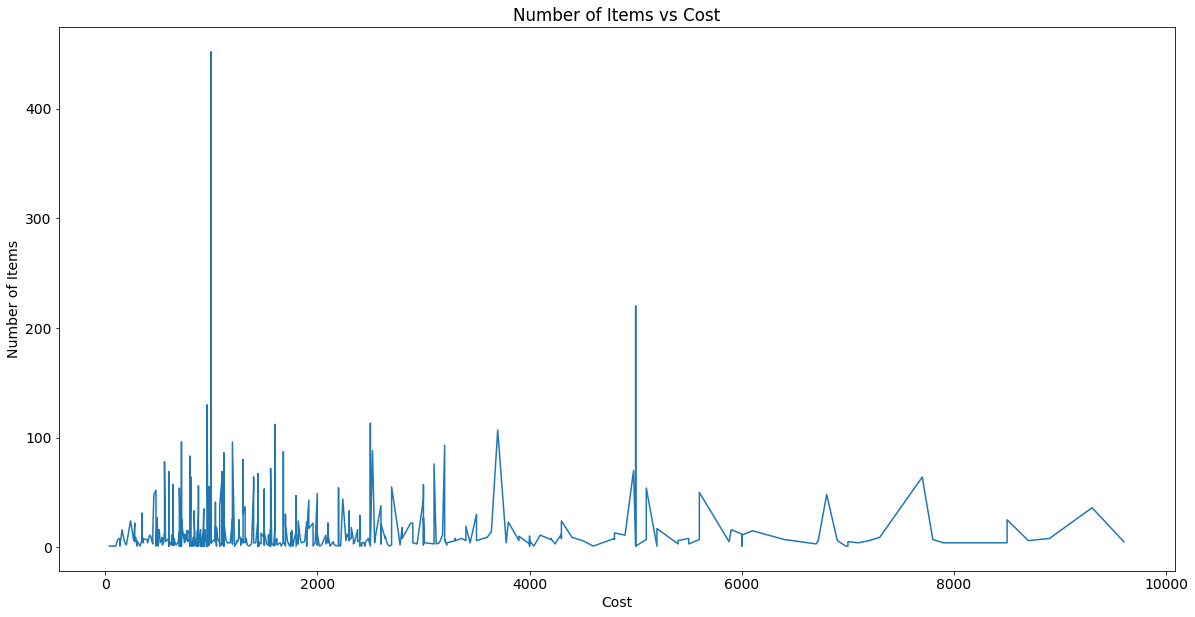

In [193]:
df_update = df_tot[df_tot["cost"] < 10000]
print(df_update)
plt.plot(df_update["cost"], df_update["counts"])
plt.title("Number of Items vs Cost")
plt.ylabel("Number of Items")
plt.xlabel("Cost")
plt.show()